<a id="1"></a>
# <p style="background-color:#ffb037;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:8px 10px;">IMPORT LIBRARIES</p>    

In [1]:
# Basic Operation
import pandas as pd
import numpy as np

# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re


from sklearn.model_selection import train_test_split # Split Data 
from imblearn.over_sampling import SMOTE # Handling Imbalanced

# Model Building
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC


from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics  


# Data Visualization 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from termcolor import cprint
import seaborn as sns
import warnings   


warnings.filterwarnings('ignore')
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<a id="2"></a>
# <p style="background-color:#ffb037;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:8px 10px;">LOAD DATA</p>    

In [76]:
df = pd.read_csv('../content/Tweets.csv')


In [77]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [78]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df.shape

(14640, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [6]:
#checking null values in our data
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,14640.0,5.692184e+17,7.791112e+14,5.675883e+17,5.685592e+17,5.694779e+17,5.698905e+17,5.703106e+17
airline_sentiment_confidence,14640.0,9.001689e-01,1.628300e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10522.0,6.382983e-01,3.304398e-01,0.000000e+00,3.606000e-01,6.706000e-01,1.000000e+00,1.000000e+00
retweet_count,14640.0,8.265027e-02,7.457782e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


<a id="3"></a>
# <p style="background-color:#ffb037;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:8px 10px;">DATA VISUALIZATION</p>      

In [4]:
cprint('Total Null Values in Dataset :','green')
print(df.isnull().sum()) # showing null values of train data
plt.figure(figsize=(14,8))





Total Null Values in Dataset :
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


<Figure size 1008x576 with 0 Axes>

<Figure size 1008x576 with 0 Axes>

In [9]:
cprint('Total Null Values in Dataset :','green')
print(df.isnull().sum()) # showing null values of train data

Total Null Values in Dataset :
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


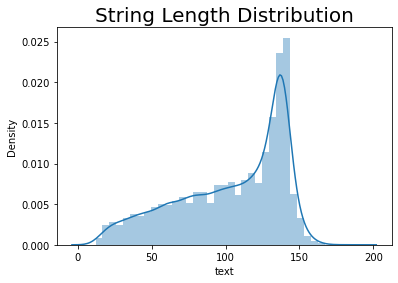

In [10]:
sns.distplot(df.text.str.len())
plt.title("String Length Distribution",  fontdict={'fontsize': 20})

plt.show()

**Percentage null or na values in the dataframe**

In [11]:
print("Percentage null or na values in df")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage null or na values in df


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

**Knowledge Extraction**

In [12]:
df['tweet_created'] = pd.to_datetime(df['tweet_created']).dt.date
df['tweet_created'] = pd.to_datetime(df['tweet_created'])


In [13]:
df['tweet_created'].min()

Timestamp('2015-02-16 00:00:00')

In [14]:
df['tweet_created'].max()

Timestamp('2015-02-24 00:00:00')

In [15]:
#checking uniques values in tweet_created columns
df['tweet_created'].nunique()

9

In [114]:
numberoftweets = df.groupby('tweet_created').size()

In [115]:
numberoftweets

tweet_created
2015-02-16 23:36:05 -0800    1
2015-02-16 23:43:02 -0800    1
2015-02-16 23:48:48 -0800    1
2015-02-16 23:52:20 -0800    1
2015-02-17 00:00:36 -0800    1
                            ..
2015-02-24 11:48:29 -0800    1
2015-02-24 11:48:37 -0800    1
2015-02-24 11:48:38 -0800    1
2015-02-24 11:51:48 -0800    1
2015-02-24 11:53:37 -0800    1
Length: 14247, dtype: int64

In [5]:
cprint("Total number of sentiments of tweets :",'green')
print(df.airline_sentiment.value_counts())

Total number of sentiments of tweets :
negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


Total number of sentiments of tweets :
negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


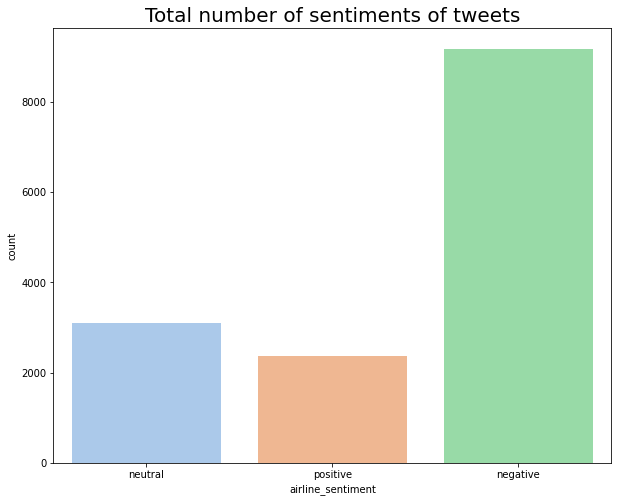

In [6]:
cprint("Total number of sentiments of tweets :",'green')
print(df.airline_sentiment.value_counts())
plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline_sentiment', data = df, palette = 'pastel')
ax.set_title(label = 'Total number of sentiments of tweets', fontsize = 20)
plt.show()

Total number of tweets for each airline :
airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline_sentiment, dtype: int64


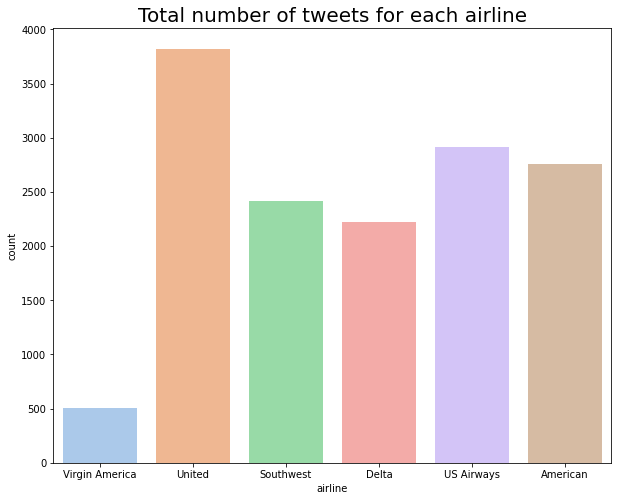

Total number of sentiment tweets for each airline :
US Airways : 
 negative    2263
neutral      381
positive     269
Name: airline_sentiment, dtype: int64
United : 
 negative    2633
neutral      697
positive     492
Name: airline_sentiment, dtype: int64
American : 
 negative    1960
neutral      463
positive     336
Name: airline_sentiment, dtype: int64
Southwest : 
 negative    1186
neutral      664
positive     570
Name: airline_sentiment, dtype: int64
Delta : 
 negative    955
neutral     723
positive    544
Name: airline_sentiment, dtype: int64
Virgin America : 
 negative    181
neutral     171
positive    152
Name: airline_sentiment, dtype: int64


In [21]:
cprint("Total number of tweets for each airline :",'green')
print(df.groupby('airline')['airline_sentiment'].count())



plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline', data = df, palette = 'pastel')
ax.set_title(label = 'Total number of tweets for each airline', fontsize = 20)
plt.show()


cprint("Total number of sentiment tweets for each airline :",'green')
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
for i in airlines :
    print('{} : \n'.format(i),df.loc[df.airline == i].airline_sentiment.value_counts())

**Total number of tweets for each airline**

airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline_sentiment, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


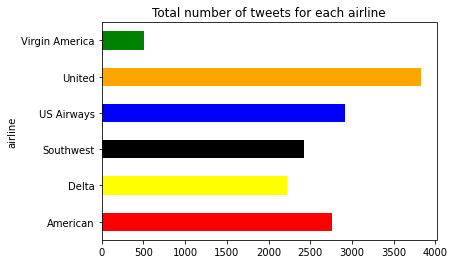

In [22]:
print(df.groupby('airline')['airline_sentiment'].count())
plt.title('Total number of tweets for each airline')
print(df.groupby('airline')['airline_sentiment'].count().plot(kind='barh', color=['red', 'yellow', 'black', 'blue', 'orange','green']))

Reasons Of Negative Tweets :
Customer Service Issue    2910
Late Flight               1665
Can't Tell                1190
Cancelled Flight           847
Lost Luggage               724
Name: negativereason, dtype: int64


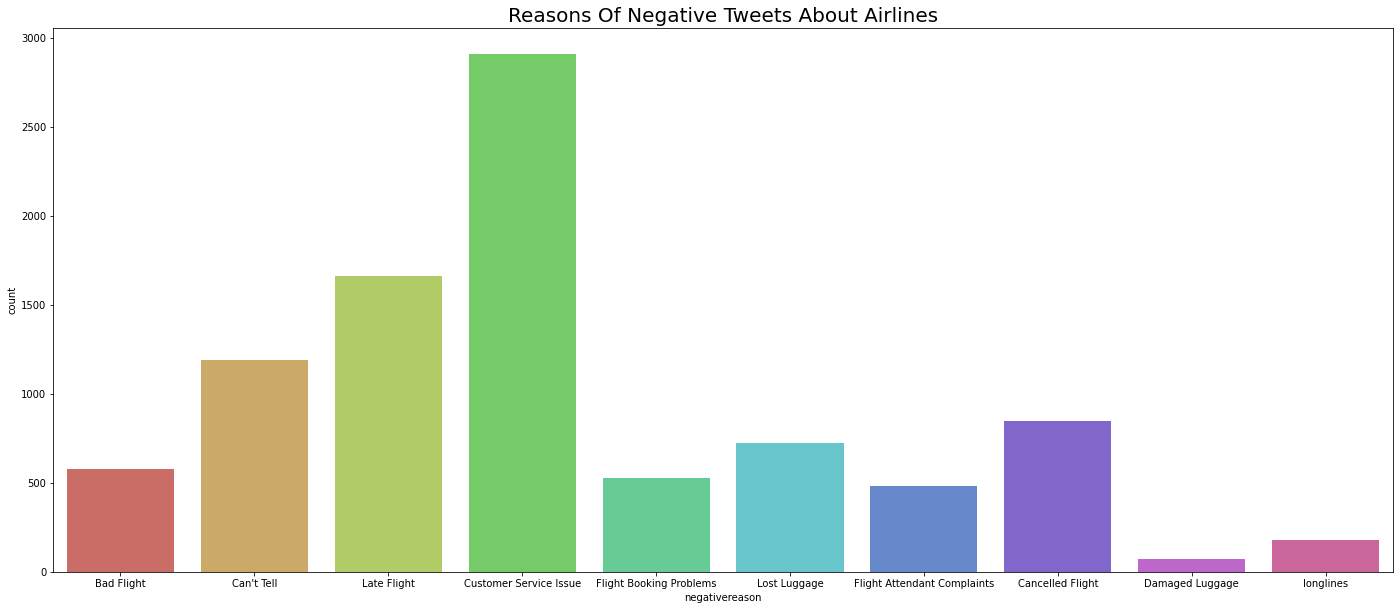

In [23]:
cprint('Reasons Of Negative Tweets :','green')
print(df.negativereason.value_counts().nlargest(5))

plt.figure(figsize = (24, 10))
sns.countplot(x = 'negativereason', data = df, palette = 'hls')
plt.title('Reasons Of Negative Tweets About Airlines', fontsize = 20)
plt.show()

Top 5 Reasons Of Negative Tweets :
AxesSubplot(0.125,0.125;0.775x0.755)


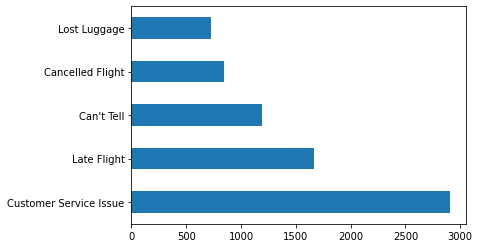

In [24]:
cprint('Top 5 Reasons Of Negative Tweets :','green') # [:20]
print(df.negativereason.value_counts()[:5].plot(kind='barh'))

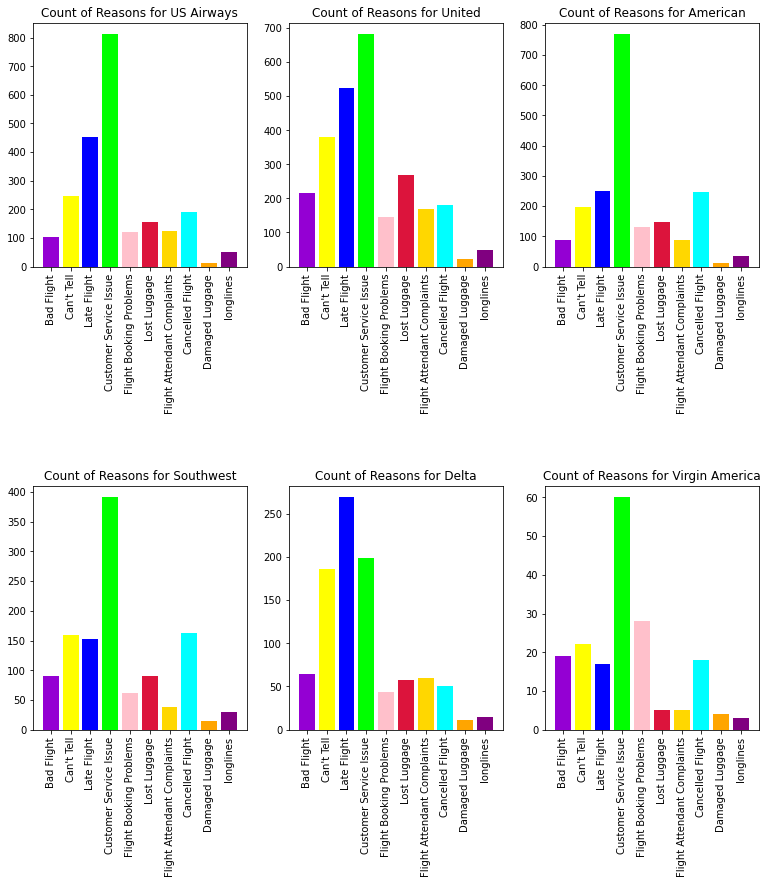

In [25]:
NR_Count=df['negativereason'].value_counts()
def NCount(Airline):
    airlineName =df[df['airline']==Airline]
    count= airlineName['negativereason'].value_counts()
    Unique_reason= df['negativereason'].unique()
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def plot_reason(airline):
    a= NCount(airline)
    count=a['count']
    Id = range(1,(len(a)+1))
    plt.bar(Id,count, color=['darkviolet','yellow','blue','lime','pink','crimson','gold','cyan','orange','purple'])
    plt.xticks(Id,a['Reasons'],rotation=90)
    plt.title('Count of Reasons for '+ airline)
    
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

In [19]:
df_neg = df[df.airline_sentiment == 'negative']
display(df_neg.shape, df_neg.head())
names = df.airline.unique()
for name in names:
    print(f"{name} : Out of total {format(len(df[df.airline == name]),',')}customers, {(len(df_neg[df_neg.airline == name]) / len(df[df.airline == name]))*100:.1f}% feel negative.\n")



(9178, 15)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24,NaN,Pacific Time (US & Canada)
15,570282469121007616,negative,0.6842,Late Flight,0.3684,Virgin America,NaN,smartwatermelon,NaN,0,@VirginAmerica SFO-PDX schedule is still MIA.,NaN,2015-02-24,"palo alto, ca",Pacific Time (US & Canada)
17,570276917301137409,negative,1.0000,Bad Flight,1.0000,Virgin America,NaN,heatherovieda,NaN,0,@VirginAmerica I flew from NYC to SFO last we...,NaN,2015-02-24,this place called NYC,Eastern Time (US & Canada)


Virgin America : Out of total 504customers, 35.9% feel negative.

United : Out of total 3,822customers, 68.9% feel negative.

Southwest : Out of total 2,420customers, 49.0% feel negative.

Delta : Out of total 2,222customers, 43.0% feel negative.

US Airways : Out of total 2,913customers, 77.7% feel negative.

American : Out of total 2,759customers, 71.0% feel negative.



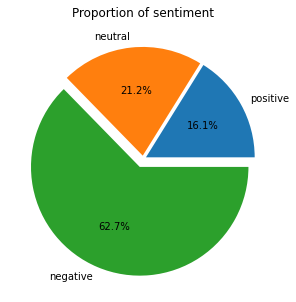

In [27]:
x = df.airline_sentiment.value_counts().sort_values()

plt.figure(figsize=(5, 5))
ax = plt.pie(x = x, labels=x.index, autopct = '%1.1f%%', explode = [0.03, 0.03, 0.08])
plt.title('Proportion of sentiment')

plt.show()

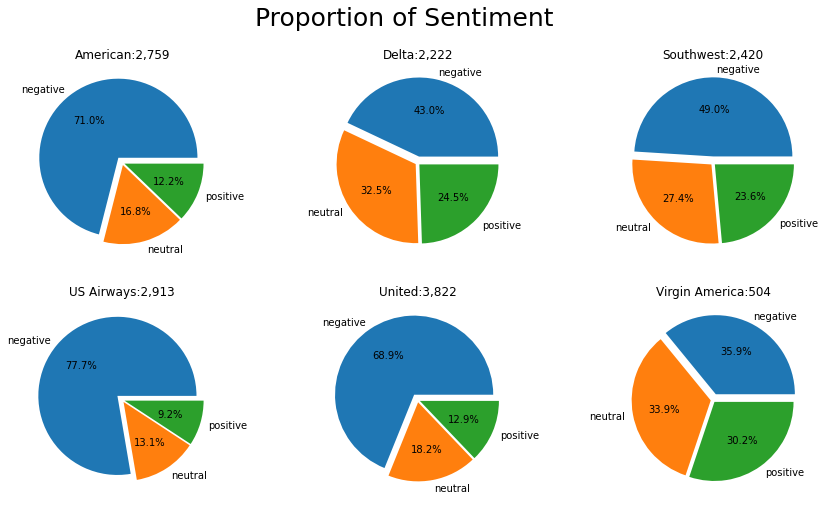

In [28]:
a = df.groupby(['airline', 'airline_sentiment'])['airline_sentiment'].count().unstack()
# a['total'] =  [a.values[x].sum() for x in range(0,6)]
a
fig, axes = plt.subplots(2, 3, figsize = (15, 8))
axes = axes.flatten()
for i, ax in zip(range(0, 6), axes):
    temp = a.iloc[i]    
    ax.pie(x = temp, labels = temp.index, autopct = '%1.1f%%', explode = [0.08, 0.03, 0.03])
    ax.set_title(f"{a.index[i]}:{format(a.values[i].sum(),',')}")

plt.suptitle("Proportion of Sentiment", fontsize = 25)    
plt.show()

Text(0.5, 1.0, 'Proportion of sentiment')

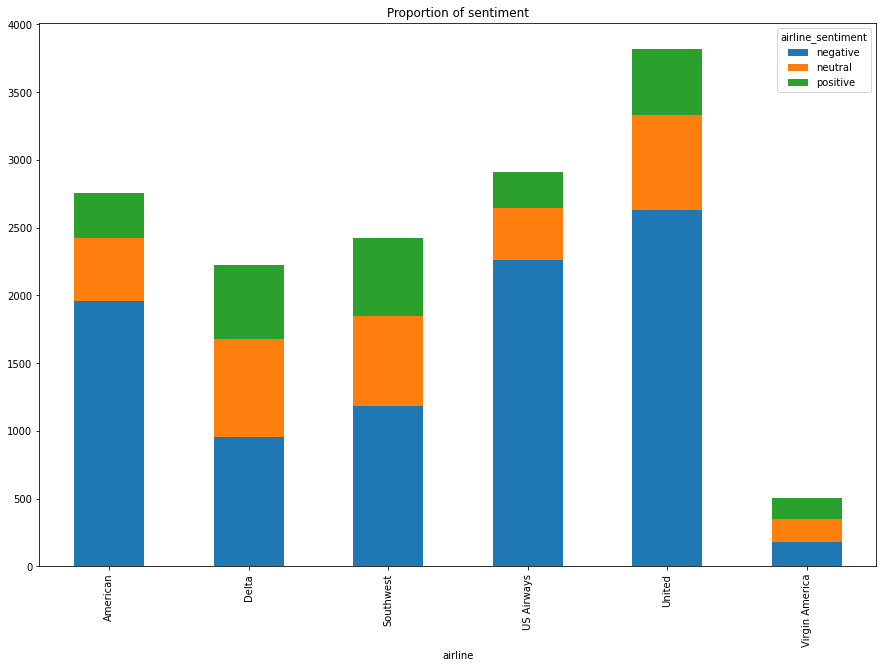

In [29]:
figure_2 = df.groupby(['airline', 'airline_sentiment']).size()
figure_2.unstack().plot(kind='bar', stacked=True, figsize=(15,10))
plt.title('Proportion of sentiment')

Split text of Sentiments    

In [79]:
# Split text of Sentiments    
positive = df[df['airline_sentiment'] == 'positive'].text
neutral  = df[df['airline_sentiment'] == 'neutral'].text
negative  = df[df['airline_sentiment'] == 'negative'].text

In [83]:
positive


1        @VirginAmerica plus you've added commercials t...
6        @VirginAmerica yes, nearly every time I fly VX...
8          @virginamerica Well, I didn't…but NOW I DO! :-D
9        @VirginAmerica it was amazing, and arrived an ...
11       @VirginAmerica I &lt;3 pretty graphics. so muc...
                               ...                        
14623    @AmericanAir Love the new planes for the JFK-L...
14625    @AmericanAir Flight 236 was great. Fantastic c...
14628    Thank you. “@AmericanAir: @jlhalldc Customer R...
14630                          @AmericanAir Thanks! He is.
14635    @AmericanAir thank you we got on a different f...
Name: text, Length: 2363, dtype: object

In [8]:
neutral

0                      @VirginAmerica What @dhepburn said.
2        @VirginAmerica I didn't today... Must mean I n...
7        @VirginAmerica Really missed a prime opportuni...
10       @VirginAmerica did you know that suicide is th...
23       @VirginAmerica will you be making BOS&gt;LAS n...
                               ...                        
14607           @AmericanAir i need someone to help me out
14611    @AmericanAir guarantee no retribution? If so, ...
14632    “@AmericanAir: @TilleyMonsta George, that does...
14637    @AmericanAir Please bring American Airlines to...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 3099, dtype: object

## **Text preprocessing**

In [85]:
# convert Sentiments to 0,1,2
def convert_Sentiment(sentiment):
    if  sentiment == "positive":
        return 2
    elif sentiment == "neutral":
        return 1
    elif sentiment == "negative":
        return 0

In [86]:
# Apply convert_Sentiment function
df.airline_sentiment = df.airline_sentiment.apply(lambda x : convert_Sentiment(x))

In [87]:
df.airline_sentiment

0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: int64

In [88]:
# Remove stop words
#
# Remove url  
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Remove punct
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Remove html 
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove @username
def remove_username(text):
    return re.sub('@[^\s]+','',text)

# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


# Decontraction text
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text  

# Seperate alphanumeric
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

# combaine negative reason with  tweet (if exsist)
df['final_text'] = df['negativereason'].fillna('') + ' ' + df['text'] 


# Apply functions on tweets
df['final_text'] = df['final_text'].apply(lambda x : remove_username(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_url(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_emoji(x))
df['final_text'] = df['final_text'].apply(lambda x : decontraction(x))
df['final_text'] = df['final_text'].apply(lambda x : seperate_alphanumeric(x))
df['final_text'] = df['final_text'].apply(lambda x : unique_char(cont_rep_char,x))
df['final_text'] = df['final_text'].apply(lambda x : char(x))
df['final_text'] = df['final_text'].apply(lambda x : x.lower())
#df['final_text'] = df['final_text'].apply(lambda x : remove_stopwords(x))

In [89]:
# result
df['final_text']

0                                                what said
1        plus you have added commercials to the experie...
2        i did not today must mean i need to take anoth...
3        bad flight it is really aggressive to blast ob...
4        ca not tell and it is a really big bad thing a...
                               ...                        
14635    thank you we got on a different flight to chicago
14636    customer service issue leaving over    minutes...
14637      please bring american airlines to blackberry   
14638    customer service issue you have my money you c...
14639    we have   ppl so we need   know how many seats...
Name: final_text, Length: 14640, dtype: object

In [90]:
df["text"]

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [95]:

df3 = pd.concat([df['final_text'], df['airline_sentiment']], axis=1)

In [96]:
df3

,final_text,airline_sentiment
0,what said,1
1,plus you have added commercials to the experie...,2
2,i did not today must mean i need to take anoth...,1
3,bad flight it is really aggressive to blast ob...,0
4,ca not tell and it is a really big bad thing a...,0
...,...,...
14635,thank you we got on a different flight to chicago,2
14636,customer service issue leaving over minutes...,0
14637,please bring american airlines to blackberry,1
14638,customer service issue you have my money you c...,0


In [93]:
neutral

0                      @VirginAmerica What @dhepburn said.
2        @VirginAmerica I didn't today... Must mean I n...
7        @VirginAmerica Really missed a prime opportuni...
10       @VirginAmerica did you know that suicide is th...
23       @VirginAmerica will you be making BOS&gt;LAS n...
                               ...                        
14607           @AmericanAir i need someone to help me out
14611    @AmericanAir guarantee no retribution? If so, ...
14632    “@AmericanAir: @TilleyMonsta George, that does...
14637    @AmericanAir Please bring American Airlines to...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 3099, dtype: object

### word cloud of positive sentiments

In [100]:
# filtering only positive  words
pd.options.display.max_colwidth = 100
positive_filtered= df3.loc[df3['airline_sentiment'] == 2]
positive_filtered

,final_text,airline_sentiment
1,plus you have added commercials to the experience tacky,2
6,yes nearly every time i fly vx this ear worm won t go away,2
8,well i did not but now i do d,2
9,it was amazing and arrived an hour early you are too good to me,2
11,i lt pretty graphics so much better than minimal iconography d,2
...,...,...
14623,love the new planes for the jfk lax run maybe one day i will be on one where the amenities all f...,2
14625,flight was great fantastic cabin crew a landing thankyou jfk,2
14628,thank you customer relations will review your concerns and contact you back directly john,2
14630,thanks he is,2


In [101]:
positive_filtered["final_text"]

1                                                    plus you have added commercials to the experience tacky
6                                                 yes nearly every time i fly vx this ear worm won t go away
8                                                                              well i did not but now i do d
9                                            it was amazing and arrived an hour early you are too good to me
11                                          i lt   pretty graphics so much better than minimal iconography d
                                                        ...                                                 
14623    love the new planes for the jfk lax run maybe one day i will be on one where the amenities all f...
14625                                       flight     was great fantastic cabin crew a landing thankyou jfk
14628              thank you customer relations will review your concerns and contact you back directly john
14630              

Text(0.5, 1.0, 'word cloud of positive sentiments')

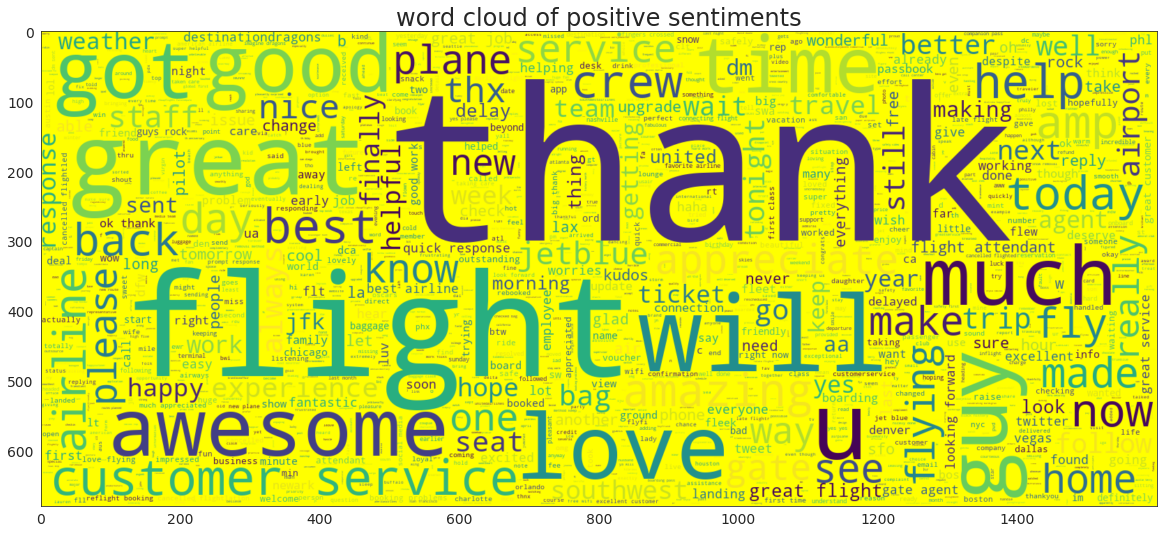

In [102]:
# word count of positive sentiments
plt.figure(figsize = (20,20)) 
worldcould_pos = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680,background_color ='yellow').generate(" ".join(positive_filtered["final_text"]))
plt.imshow(worldcould_pos,interpolation = 'bilinear')
plt.title("word cloud of positive sentiments" , fontsize = 24)
#ax.grid(False)

### word cloud of negative sentiments

In [105]:
pd.options.display.max_colwidth = 100
negative_filtered= df3.loc[df3['airline_sentiment'] == 0]
negative_filtered

,final_text,airline_sentiment
3,bad flight it is really aggressive to blast obnoxious entertainment in your guests faces amp the...,0
4,ca not tell and it is a really big bad thing about it,0
5,ca not tell seriously would pay a flight for seats that did not have this playing it is reall...,0
15,late flight sfo pdx schedule is still mia,0
17,bad flight i flew from nyc to sfo last week and could not fully sit in my seat due to two large ...,0
...,...,...
14631,bad flight thx for nothing on getting us out of the country and back to us broken plane come on ...,0
14633,cancelled flight my flight was cancelled flightled leaving tomorrow morning auto rebooked for a ...,0
14634,late flight right on cue with the delays,0
14636,customer service issue leaving over minutes late flight no warnings or communication until we...,0


Text(0.5, 1.0, 'word cloud of negative sentiments')

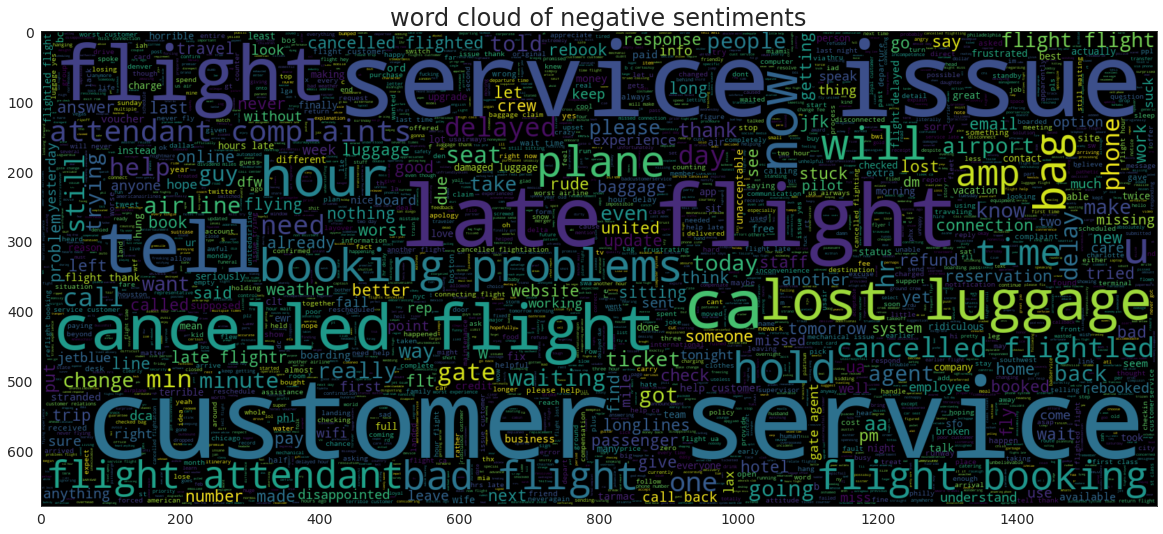

In [107]:
# word count of negative sentiments
plt.figure(figsize = (20,20)) 
worldcould_pos = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680).generate(" ".join(negative_filtered["final_text"]))
plt.imshow(worldcould_pos,interpolation = 'bilinear')
plt.title("word cloud of negative sentiments" , fontsize = 24)
#ax.grid(False)

### word cloud of neutral sentiment

In [109]:
pd.options.display.max_colwidth = 100
neutral_filtered= df3.loc[df3['airline_sentiment'] == 1]
neutral_filtered

,final_text,airline_sentiment
0,what said,1
2,i did not today must mean i need to take another trip,1
7,really missed a prime opportunity for men without hats parody there,1
10,did you know that suicide is the second leading cause of death among teens,1
23,will you be making bos gt las non stop permanently anytime soon,1
...,...,...
14607,i need someone to help me out,1
14611,guarantee no retribution if so i would be glad to share,1
14632,george that does not look good please follow this link to start the refund process,1
14637,please bring american airlines to blackberry,1


Text(0.5, 1.0, 'word cloud of neutral sentiments')

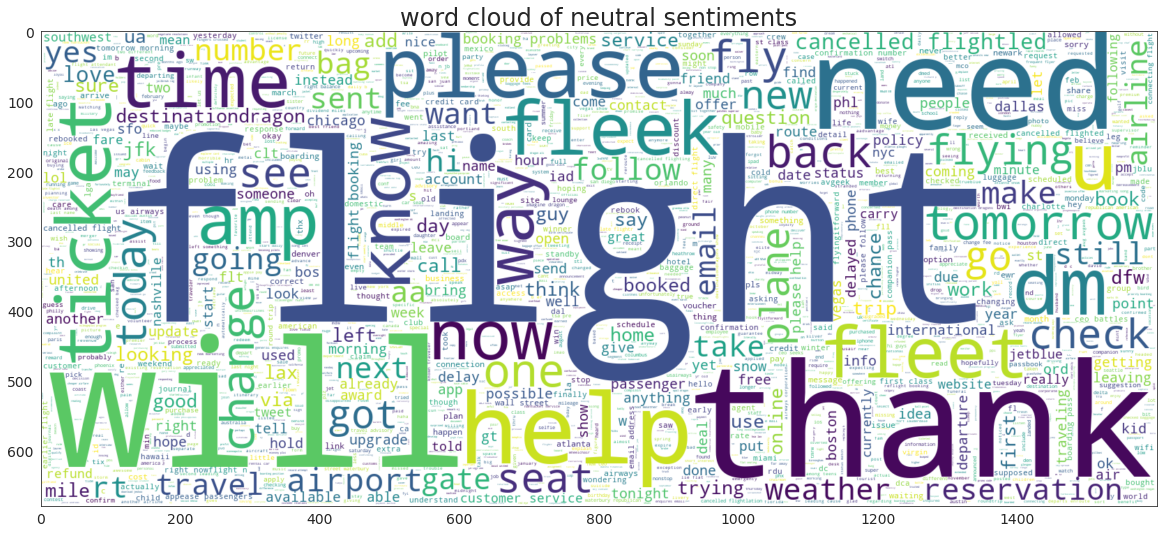

In [110]:
# word count of negative sentiments
plt.figure(figsize = (20,20)) 
worldcould_pos = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680,background_color ='white').generate(" ".join(neutral_filtered["final_text"]))
plt.imshow(worldcould_pos,interpolation = 'bilinear')
plt.title("word cloud of neutral sentiments" , fontsize = 24)

## Training Text Split 

In [16]:
X = df['final_text']
y = df['airline_sentiment']

In [17]:
# Apply TFIDF on cleaned tweets
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

<a id="5"></a>
# <p style="background-color:#ffb037;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:8px 10px;">HANDLING IMBALANCE </p>  

In [18]:
# Handling imbalanced using SMOTE
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

In [19]:
# Split Data into train & test 
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.2)

In [20]:
print("X_train.shape",X_train.shape)
print("X_test.shape",X_test.shape)

X_train.shape (22027, 11124)
X_test.shape (5507, 11124)


## [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [21]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [22]:
rf_prediction =  rf.predict(X_test)

In [23]:
accuracy_score(rf_prediction,y_test)

0.9598692573088796

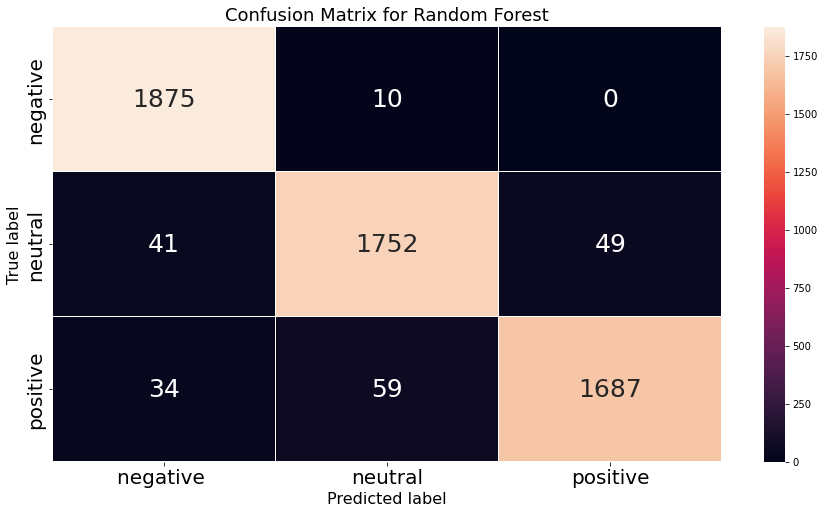

In [49]:
cm = confusion_matrix(y_test, rf_prediction)
cm
#defining the size of the canvas
plt.rcParams['figure.figsize'] = [15,8]
#confusion matrix to DataFrame
conf_matrix = pd.DataFrame(data = cm,columns = ['negative ','neutral','positive'], index = ['negative','neutral','positive'])
#plotting the confusion matrix
plt.title('Confusion Matrix for Random Forest', fontsize = 18)
#sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
sns.heatmap(conf_matrix, annot = True ,  fmt = "d", linewidths = 0.1, annot_kws = {'size':25})
plt.ylabel('True label',fontsize = 16)
plt.xlabel('Predicted label', fontsize = 16)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [50]:
print(classification_report(y_test,rf_prediction))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1885
           1       0.96      0.95      0.96      1842
           2       0.97      0.95      0.96      1780

    accuracy                           0.96      5507
   macro avg       0.97      0.96      0.96      5507
weighted avg       0.97      0.96      0.96      5507



In [51]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

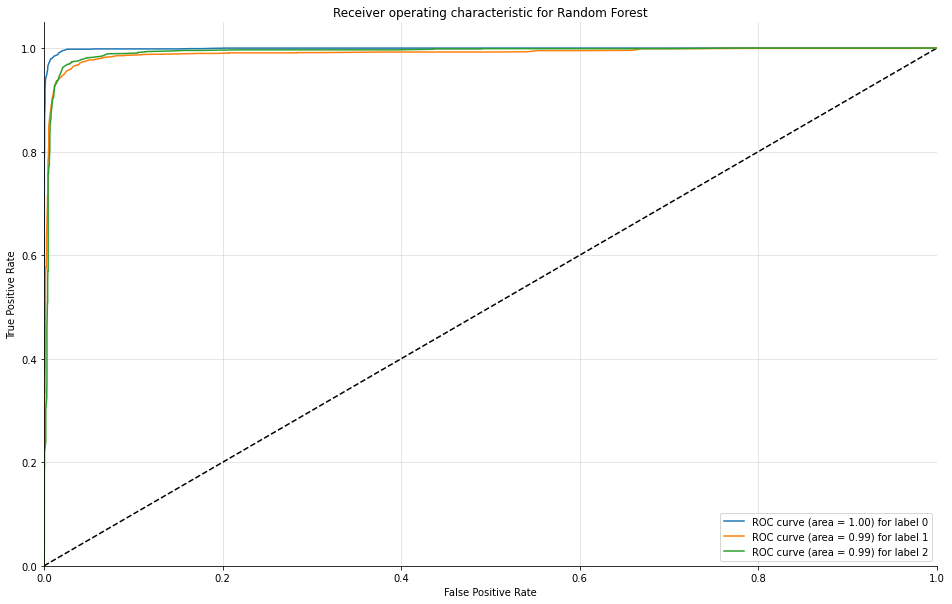

In [52]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic for Random Forest')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(rf, X_test, y_test, n_classes=3, figsize=(16, 10))

## [XGBClassifier](https://xgboost.readthedocs.io/en/latest/index.html)

In [53]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

In [54]:
xgb_prediction =  xgb.predict(X_test)

In [55]:
accuracy_score(xgb_prediction,y_test)

0.8850553840566552

In [56]:
cm = confusion_matrix(y_test, xgb_prediction)
cm


array([[1865,   13,    7],
       [  33, 1638,  171],
       [  28,  381, 1371]])

## [GradientBoostingClassifier](http://scikitlearn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

In [57]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [58]:
gbc_prediction =  gbc.predict(X_test)

In [59]:
accuracy_score(gbc_prediction,y_test)

0.8952242600326856

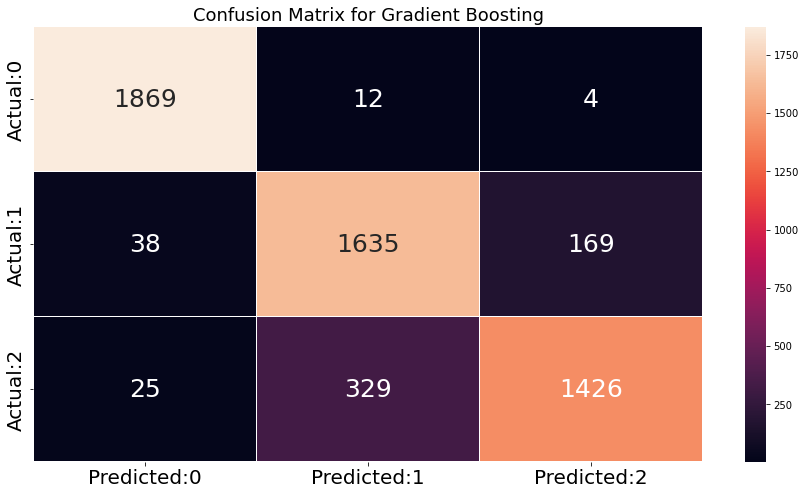

In [60]:
cm = confusion_matrix(y_test, gbc_prediction)
cm
#defining the size of the canvas
plt.rcParams['figure.figsize'] = [15,8]
#confusion matrix to DataFrame
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1','Predicted:2'], index = ['Actual:0','Actual:1','Actual:2'])
#plotting the confusion matrix
plt.title('Confusion Matrix for Gradient Boosting', fontsize = 18)
#sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
sns.heatmap(conf_matrix, annot = True ,  fmt = "d", linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [62]:
print(classification_report(y_test,gbc_prediction))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1885
           1       0.83      0.89      0.86      1842
           2       0.89      0.80      0.84      1780

    accuracy                           0.90      5507
   macro avg       0.90      0.89      0.89      5507
weighted avg       0.90      0.90      0.89      5507



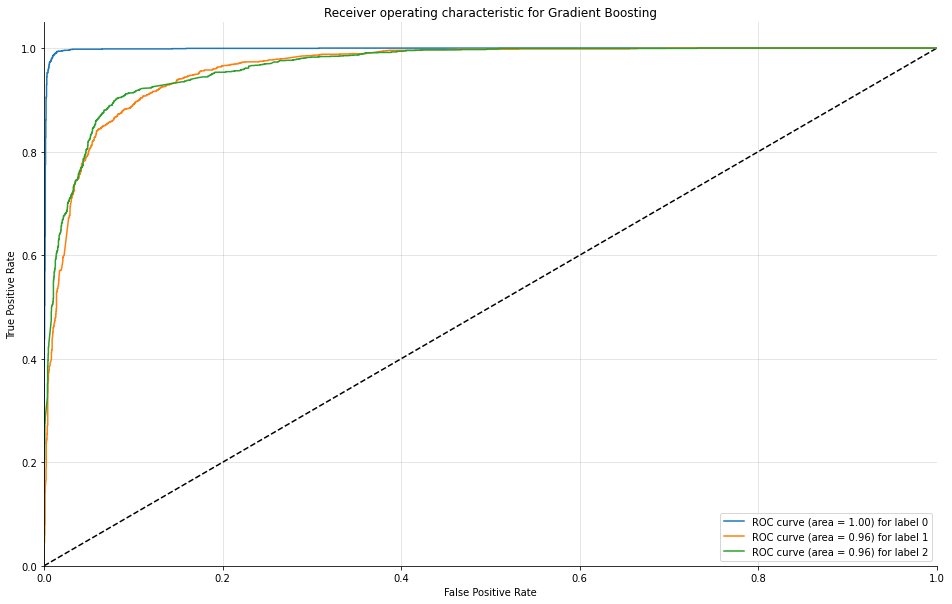

In [63]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic for Gradient Boosting')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(gbc, X_test, y_test, n_classes=3, figsize=(16, 10))

## [Support vector machine](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [32]:
svm = SVC(probability=True)
svm.fit(X_train,y_train)

SVC(probability=True)

In [65]:
svm_prediction =  svm.predict(X_test)

In [66]:
accuracy_score(svm_prediction,y_test)

0.9780279644089341

In [67]:
#building confusion matrix
cm = confusion_matrix(y_test, svm_prediction)
cm


array([[1881,    4,    0],
       [  18, 1774,   50],
       [  10,   39, 1731]])

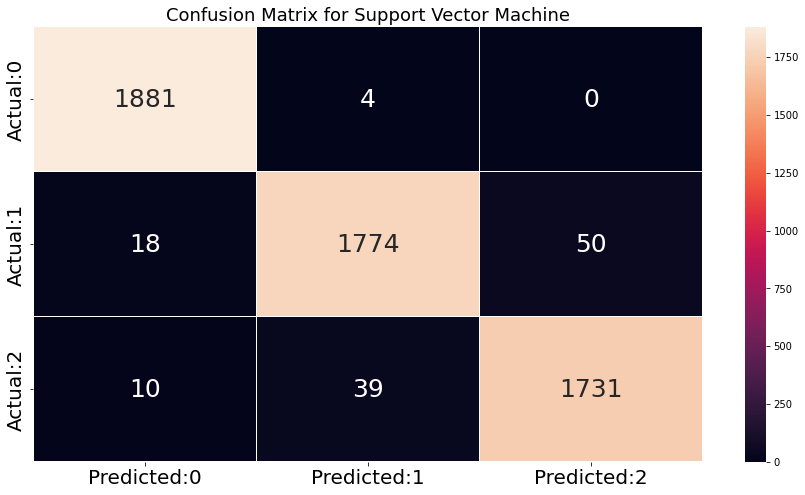

In [68]:
#defining the size of the canvas
plt.rcParams['figure.figsize'] = [15,8]
#confusion matrix to DataFrame
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1','Predicted:2'], index = ['Actual:0','Actual:1','Actual:2'])
#plotting the confusion matrix
plt.title('Confusion Matrix for Support Vector Machine', fontsize = 18)
#sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
sns.heatmap(conf_matrix, annot = True ,  fmt = "d", linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

## another approaach for roc svm

In [37]:
svm_prediction_proba =  svm.predict_proba(X_test)

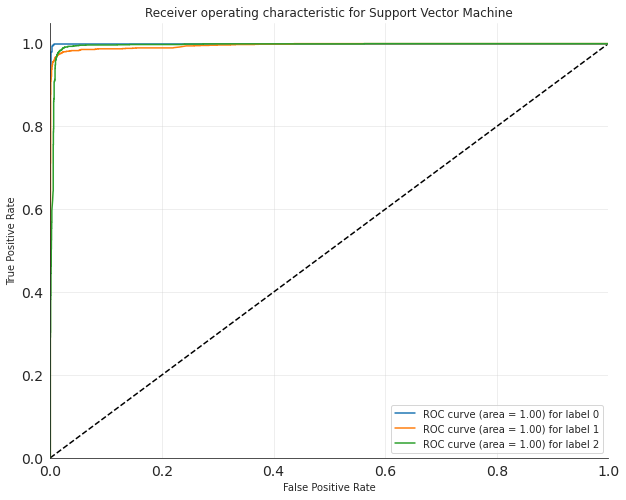

In [113]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# structures
y_score = svm_prediction_proba
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 3
figsize= (10,8)
# calculate dummies once
y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

# roc for each class
fig, ax = plt.subplots(figsize=figsize)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic for Support Vector Machine')  , #  fontsize = 20
for i in range(n_classes):
  ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
ax.legend(loc="best")
ax.grid(alpha=.4)
sns.despine()
plt.show()

Tuning the hyperparameters

In [ ]:
# Tuning the hyperparameters
parameters ={
    "C":[0.1,1,10],
    "kernel":['linear', 'rbf', 'sigmoid'],
    "gamma":['scale', 'auto']
}
# svm_optimal = grid_search(SVC(probability=True), parameters,X_train, y_train)


SVM Accuracy on best parameters

In [ ]:
# svm = SVC(probability=True, C= 0.1, gamma = "scale", kernel = "linear")
# svm.fit(X_train,y_train)

In [ ]:
# svm_prediction =  svm.predict(X_test)

In [ ]:
# accuracy_score(svm_prediction,y_test)

In [ ]:
# print(classification_report(y_test,svm_prediction))

## Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

lgstc = LogisticRegressionCV(solver="newton-cg", multi_class='auto') 
lgstc.fit(X_train, y_train)

LogisticRegressionCV(solver='newton-cg')

In [72]:
y_true=y_test
y_pred=lgstc.predict(X_test)
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_true, y_pred)

array([[[3602,   20],
        [  33, 1852]],

       [[3607,   58],
        [  69, 1773]],

       [[3661,   66],
        [  42, 1738]]])

In [74]:
lr_prediction = lgstc.predict(X_test)

In [76]:
accuracy_score(lr_prediction,y_test)

0.9738514617759215

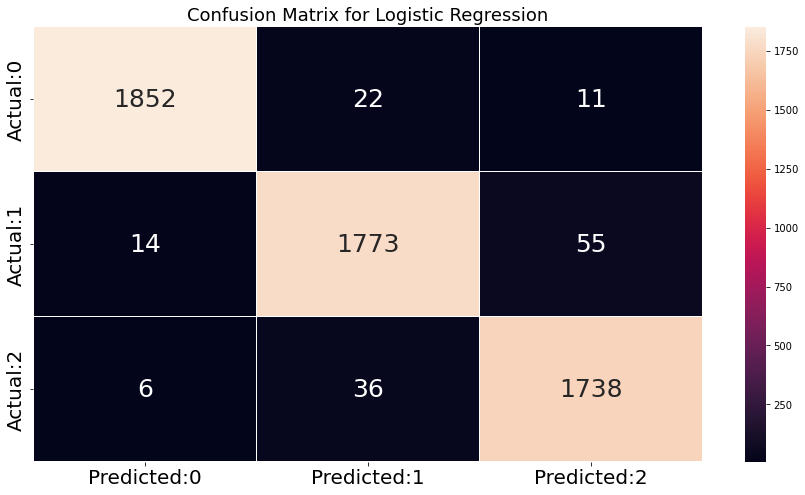

In [78]:
#building confusion matrix
cm = confusion_matrix(y_test, lr_prediction)
cm
#defining the size of the canvas
plt.rcParams['figure.figsize'] = [15,8]
#confusion matrix to DataFrame
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1','Predicted:2'], index = ['Actual:0','Actual:1','Actual:2'])
#plotting the confusion matrix
plt.title('Confusion Matrix for Logistic Regression', fontsize = 18)
#sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
sns.heatmap(conf_matrix, annot = True ,  fmt = "d", linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()


In [81]:
print(classification_report(y_test,lr_prediction))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1885
           1       0.97      0.96      0.97      1842
           2       0.96      0.98      0.97      1780

    accuracy                           0.97      5507
   macro avg       0.97      0.97      0.97      5507
weighted avg       0.97      0.97      0.97      5507



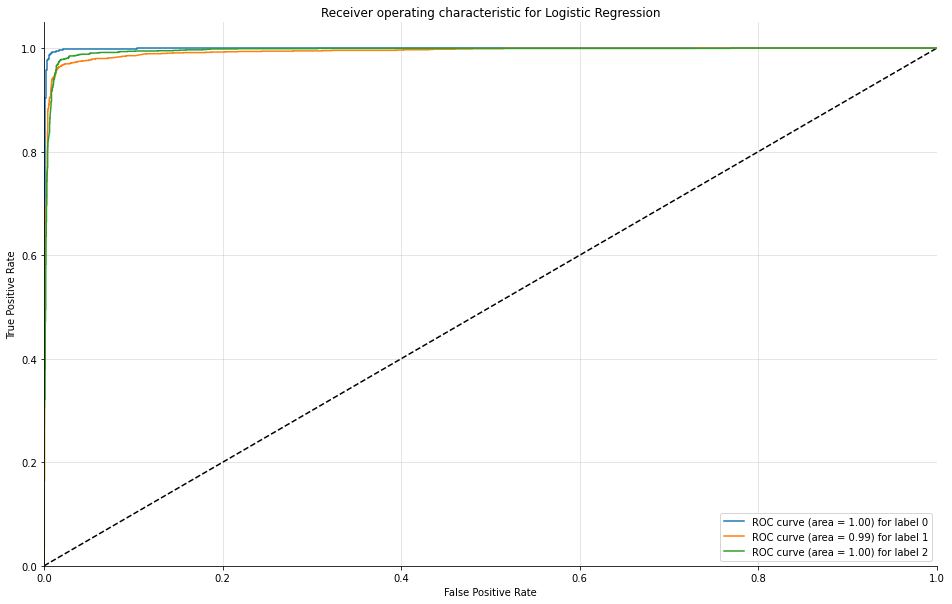

In [93]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic for Logistic Regression')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(lgstc, X_test, y_test, n_classes=3, figsize=(16, 10))

## ROC for the multiclass problem

## [Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

In [102]:
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [103]:
nb_prediction =  nb.predict(X_test)

In [104]:
accuracy_score(nb_prediction,y_test)

0.8899582349736699

In [118]:
print(classification_report(y_test,nb_prediction))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1885
           1       0.90      0.80      0.85      1842
           2       0.90      0.91      0.91      1780

    accuracy                           0.89      5507
   macro avg       0.89      0.89      0.89      5507
weighted avg       0.89      0.89      0.89      5507



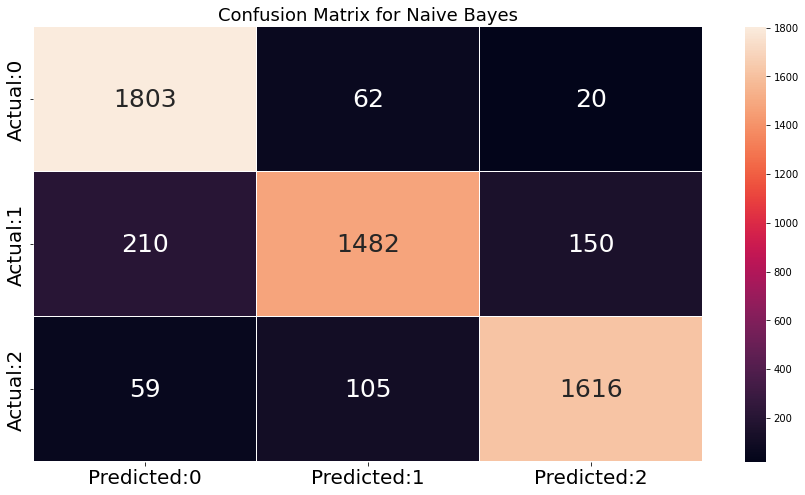

In [117]:
#building confusion matrix
cm = confusion_matrix(y_test, nb_prediction)
cm
#defining the size of the canvas
plt.rcParams['figure.figsize'] = [15,8]
#confusion matrix to DataFrame
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1','Predicted:2'], index = ['Actual:0','Actual:1','Actual:2'])
#plotting the confusion matrix
plt.title('Confusion Matrix for Naive Bayes', fontsize = 18)
#sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
sns.heatmap(conf_matrix, annot = True ,  fmt = "d", linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

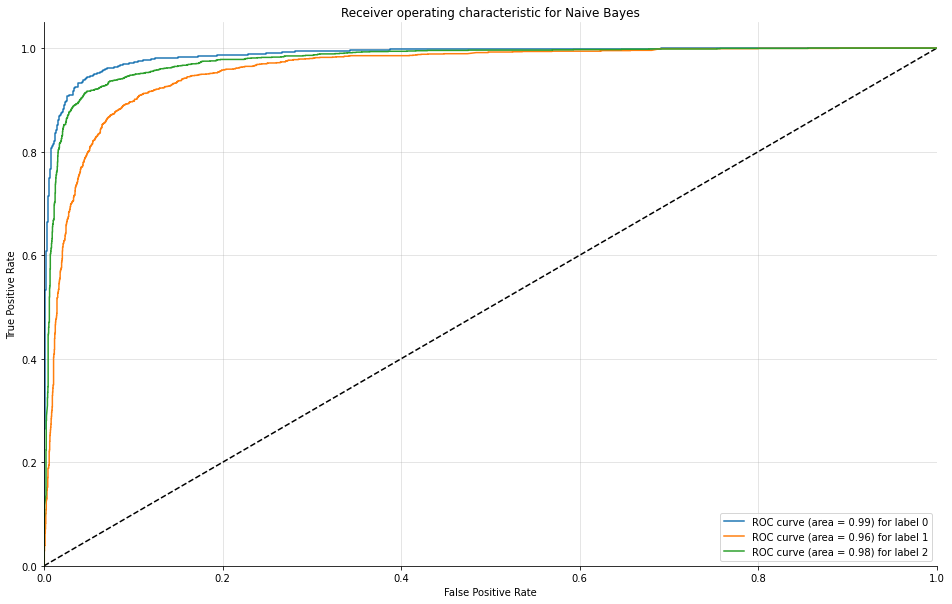

In [113]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic for Naive Bayes')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(nb, X_test, y_test, n_classes=3, figsize=(16, 10))

## [Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [106]:
ds = DecisionTreeClassifier()
ds.fit(X_train,y_train)

DecisionTreeClassifier()

In [107]:
ds_prediction =  ds.predict(X_test)

In [108]:
accuracy_score(ds_prediction,y_test)

0.9428000726348283

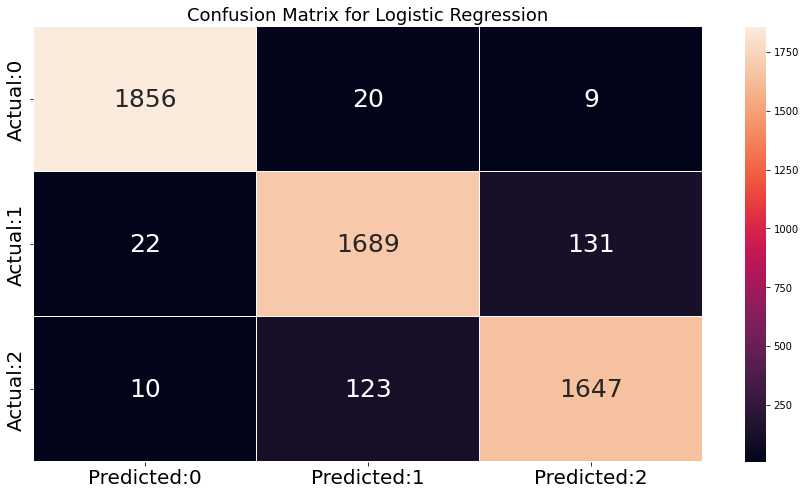

In [115]:
#building confusion matrix
cm = confusion_matrix(y_test, ds_prediction)
cm
#defining the size of the canvas
plt.rcParams['figure.figsize'] = [15,8]
#confusion matrix to DataFrame
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1','Predicted:2'], index = ['Actual:0','Actual:1','Actual:2'])
#plotting the confusion matrix
plt.title('Confusion Matrix for Logistic Regression', fontsize = 18)
#sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
sns.heatmap(conf_matrix, annot = True ,  fmt = "d", linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

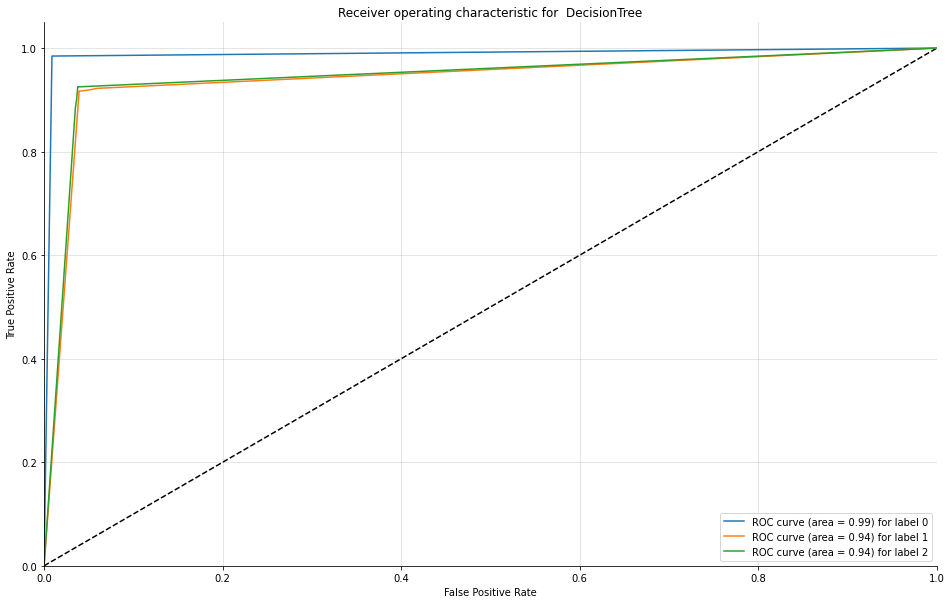

In [112]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic for  DecisionTree')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(ds, X_test, y_test, n_classes=3, figsize=(16, 10))

<a id="6"></a>
# <p style="background-color:#ffb037;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:8px 10px;">VISUALIZE  MODEL PERFORMENCE</p>  

In [ ]:
cr = classification_report(y_test, rf_prediction)

In [ ]:
print("Classification Report:\n----------------------\n", cr)

cm = confusion_matrix(y_test,rf_prediction)


# plot confusion matrix 
plt.figure(figsize=(8,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()